# Demo using CSV with Pandas, Matplotlib and NumPy
### `loriacarlos@gmail.com`
### EIF203 I-2018
### UNA

Some examples using Python known packages for our bubble experiment
* pandas
* numpy
* statsmodel
---
Links 
1. [Plot in pandas](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/)
2. [Video showing linear model](https://www.youtube.com/watch?v=ro5ftxuD6is)
3. [Video non-linear regression](https://www.youtube.com/watch?v=EShuLfSxpsI)
4. [statsmodel quadratic expression](https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
5. [Setting the label legend](https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
6. [Regression with Scipy (See polyfit)](http://scipy-cookbook.readthedocs.io/items/LinearRegression.html?highlight=polyfit)
7. [Markdown Tutorial](https://www.markdowntutorial.com) [Example in Wikipedia](https://en.wikipedia.org/wiki/Markdown#Example)


In [18]:
#

In [19]:
# Reads bubble data (first edit column time(n) to be just time)
# Separator is ;
import pandas as pd
import numpy as np
# Df is a dataFrame from Pandas (una tabla muy poderosa)
df = pd.read_csv('data/bubble_time.csv', sep=";")
df

,i,n,time
0,0,20,0.012885
1,1,120,0.357826
2,2,220,1.188537
3,3,320,2.518863
4,4,420,4.455853
5,5,520,7.125808
6,6,620,10.264424
7,7,720,14.140656
8,8,820,18.838478
9,9,920,23.529861


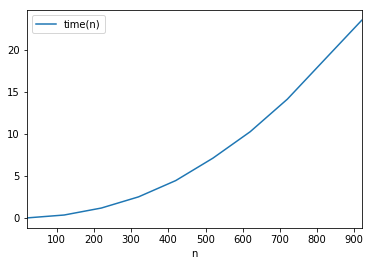

In [20]:
# Plot n versus time (inlined into notebook)
%matplotlib inline
df.plot(x="n", y="time", label="time(n)")

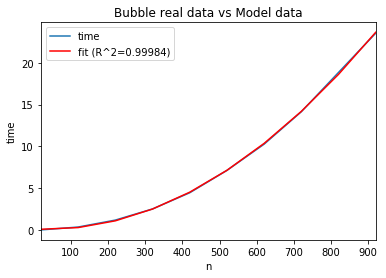

In [21]:
import warnings
warnings.filterwarnings("ignore")
# Build the model and plot it
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

fig, ax = plt.subplots()
df.plot(x='n', y='time', ax=ax)
# Customize plot
ax.set_title('Bubble real data vs Model data')
ax.set_ylabel('time')
# Build model
model = sm.formula.ols(formula='time ~  np.power(n, 2) + n', data=df)
res = model.fit()
# Add fitted values to dataframe
df_with_fit = df.assign(fit=res.fittedvalues)
# Plot
df_with_fit.plot(x='n', y='fit', ax=ax, color="red", label="fit (R^2={:0.6})".format(res.rsquared))
plt.savefig('data/bubble_model.png')


In [22]:
# Show model info
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.188e+04
Date:                Mon, 09 Apr 2018   Prob (F-statistic):           5.18e-14
Time:                        15:16:19   Log-Likelihood:                 8.9362
No. Observations:                  10   AIC:                            -11.87
Df Residuals:                       7   BIC:                            -10.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1221      0.101      1.207      0.267      -0.117       0.361
np.power(n, 2)  3.017e-05   5.15e-07     58.579      0.000     2.9e-05    3.14e-05
n                 -0.0022      0.001     -4.379      0.003      -0.003      -0.001
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                2.018
Skew:                           1.086   Prob(JB):                        0.365
Kurtosis:                       3.347   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Recover model coefficientes (in case of 3)
res.params
b, xx, x = res.params
xx, x, b


(3.0167949089562184e-05, -0.0021951704002434354, 0.12209339516711548)

# The saved png of the chart
![](data/bubble_model.png)